In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from vncorenlp import VnCoreNLP

In [2]:
with open('zac2021-ltr-data/legal_corpus.json', 'r') as f:
    competition_corpus = json.load(f)

In [3]:
with open('zac2021-ltr-data/train_question_answer.json', 'r') as f:
    competition_ques = json.load(f)

In [4]:
with open('zac2021-ltr-data/public_test_question.json', 'r') as f:
    competition_ques_test = json.load(f)

In [8]:
with open('zac2021-ltr-data/private_test_question.json', 'r') as f:
    json_private_test_ques = json.load(f)

# Định lượng dữ liệu

In [9]:
articles = [iarticle for icorpus in competition_corpus for iarticle in icorpus.get('articles')]
ques = [iques for iques in competition_ques.get('items')]
ques_test = [iques for iques in competition_ques_test.get('items')]
article_titles = [article.get('title') for article in articles]
lis_private_test_ques = [iques for iques in json_private_test_ques.get('items')]

In [11]:
# ques_test
# lis_private_test_ques

In [12]:
print('Tổng số article luật: ', len(articles))
print('Tổng số câu hỏi: ', len(ques))
print('Tổng số câu hỏi trong tập private test: ', len(lis_private_test_ques))

Tổng số article luật:  61425
Tổng số câu hỏi:  3196
Tổng số câu hỏi trong tập private test:  491


Thống kê khi chưa segmentation

In [13]:
list_corpus_txt = [iarticle.get('text') for iarticle in articles]
list_ques_txt = [iques.get('question') for iques in ques]
list_ques_test_txt = [iques.get('question') for iques in ques_test]
lis_private_test_ques_txt = [iques.get('question') for iques in lis_private_test_ques]

In [15]:
# lis_private_test_ques_txt

In [7]:
seq_leng_corpus = np.array([len(itxt.split(' ')) for itxt in list_corpus_txt])
seq_leng_ques = np.array([len(itxt.split(' ')) for itxt in list_ques_txt])

In [8]:
print('Độ dài max của các article: ', max(seq_leng_corpus))
print('Độ dài max của các question: ', max(seq_leng_ques))
print('Độ dài min của các article: ', min(seq_leng_corpus))
print('Độ dài min của các question: ', min(seq_leng_ques))
print('Độ dài trung bình của articles: ', np.average(seq_leng_corpus))
print('Độ dài trung bình của question: ', np.average(seq_leng_ques))

Độ dài max của các article:  53107
Độ dài max của các question:  44
Độ dài min của các article:  1
Độ dài min của các question:  4
Độ dài trung bình của articles:  281.3589580789581
Độ dài trung bình của question:  19.05256570713392


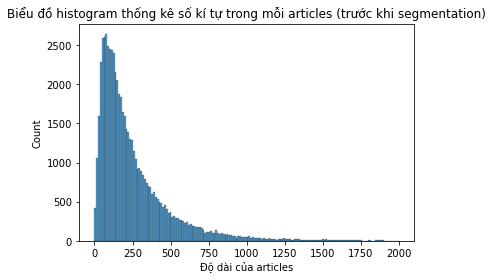

In [203]:
# Histogram độ dài các articles
sns.histplot(data=seq_leng_corpus, binrange=(0, 2000), )
plt.xlabel('Độ dài của articles')
plt.title('Biểu đồ histogram thống kê số kí tự trong mỗi articles (trước khi segmentation)')
plt.show()

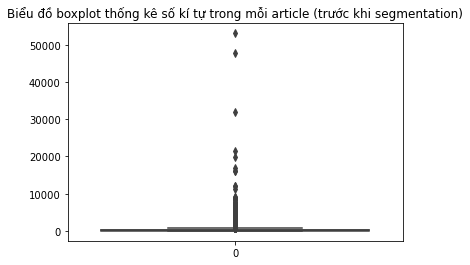

In [207]:
# Biểu đồ box_plot
sns.boxplot(data=seq_leng_corpus)
plt.title('Biểu đồ boxplot thống kê số kí tự trong mỗi article (trước khi segmentation)')
plt.show()

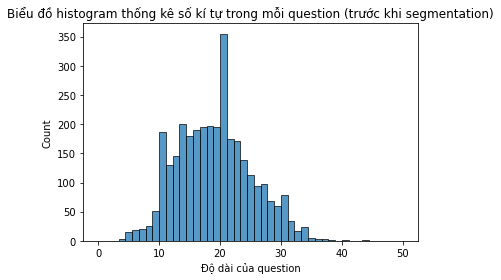

In [204]:
sns.histplot(data=seq_leng_ques, binrange=(0, 50), )
plt.xlabel('Độ dài của question')
plt.title('Biểu đồ histogram thống kê số kí tự trong mỗi question (trước khi segmentation)')
plt.show()

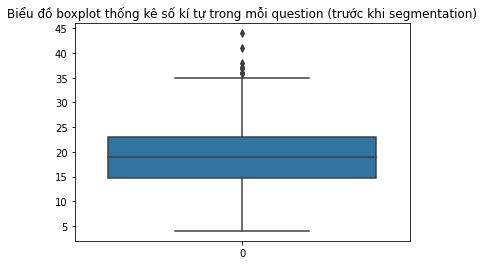

In [208]:
sns.boxplot(data=seq_leng_ques)
plt.title('Biểu đồ boxplot thống kê số kí tự trong mỗi question (trước khi segmentation)')
plt.show()

Segmentation dữ liệu trước ... 

In [21]:
annotator = VnCoreNLP("/Users/LongNH/Tools/VnCoreNLP/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx2g')

In [150]:
TOO_LONG_ARTICLE = [17161, 24965, 27900, 27908, 50363]


def too_long(i):
    assert i in TOO_LONG_ARTICLE
    if i == 17161:
        return annotator.tokenize(list_corpus_txt[17161][0:50100])
        + annotator.tokenize(list_corpus_txt[17161][50100:100079])
        + annotator.tokenize(list_corpus_txt[17161][100079:149995])
        + annotator.tokenize(list_corpus_txt[17161][149995:200000])
        + annotator.tokenize(list_corpus_txt[17161][200000:])


if i == 24965:
    return annotator.tokenize(list_corpus_txt[24965][0:50013]) +
    annotator.tokenize(list_corpus_txt[24965][50013:100000 - 1]) +
    annotator.tokenize(list_corpus_txt[24965][100000 - 1:])
if i == 27900:
    return annotator.tokenize(list_corpus_txt[27900][0:50052]) +
    annotator.tokenize(list_corpus_txt[27900][50052:100000])
if i == 27908:
    return annotator.tokenize(list_corpus_txt[27908][0:50040]) +
    annotator.tokenize(list_corpus_txt[27908][50040:100010]) +
    annotator.tokenize(list_corpus_txt[27908][100010:150000 + 14]) +
    annotator.tokenize(list_corpus_txt[27908][150000 + 14:200000 - 12]) +
    annotator.tokenize(list_corpus_txt[27908][200000 - 12:])
if i == 50363:
    return annotator.tokenize(list_corpus_txt[50363][0:50000 + 281]) +
    annotator.tokenize(list_corpus_txt[50363][50000 + 281:])


def tokenize_article(i):
    if i in TOO_LONG_ARTICLE:
        return too_long(i)
    return annotator.tokenize(list_corpus_txt[i])

In [ ]:
# list_seg_corpus_txt = [tokenize_article(i) for i in range(len(list_corpus_txt))]
list_seg_ques_txt = [annotator.tokenize(icorpus) for icorpus in list_ques_txt]
list_seg_ques_test_txt = [annotator.tokenize(iques) for iques in list_ques_test_txt]
segmented_titles = [annotator.tokenize(ititle) for ititle in article_titles]

In [22]:
list_seg_private_test_ques = [annotator.tokenize(txt_ques) for txt_ques in lis_private_test_ques_txt]

In [18]:
# list_seg_public_test_ques

In [337]:
with open('./train_ques_segmented.json', 'w') as f:
    json.dump(list_seg_ques_txt, f)

with open('./test_ques_segmented.json', 'w') as f:
    json.dump(list_seg_ques_test_txt, f)

with open('segmented_title.json', 'w') as f:
    json.dump(segmented_titles, f)


In [26]:
with open('./segmented_private_test.json', 'w') as f:
    json.dump(list_seg_private_test_ques, f)

In [7]:
with open('segemented_data/segmented_corpus.json', 'r') as f:
    list_seg_corpus_txt = json.load(f)

In [327]:
(np.array([len(ques) for ques in list_seg_ques_txt]) == 2).sum()

2

In [328]:
len(list_seg_ques_txt)

3196

Thống kê số câu theo mỗi article / question

In [180]:
num_sentence_corpus = np.array([len(icorpus) for icorpus in list_seg_corpus_txt])
num_sentence_ques = np.array([len(iques) for iques in list_seg_ques_txt])

In [166]:
print('Số câu trung bình trong corpus: ', np.average(num_sentence_corpus))
print('Số câu nhiều nhất trong corpus: ', np.max(num_sentence_corpus))

print('Số câu trung bình trong ques: ', np.average(num_sentence_ques))
print('Số câu nhiều nhất trong ques: ', np.max(num_sentence_ques))

Số câu trung bình trong corpus:  4.703492063492064
Số câu nhiều nhất trong corpus:  704
Số câu trung bình trong ques:  1.0006257822277846
Số câu nhiều nhất trong ques:  2


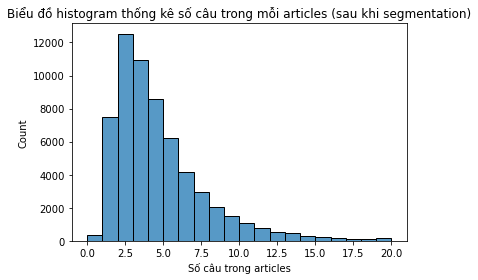

In [197]:
# Histogram số câu trong mỗi  articles
sns.histplot(data=num_sentence_corpus, binrange=(0, 20), bins=20)
plt.xlabel('Số câu trong articles')
plt.title('Biểu đồ histogram thống kê số câu trong mỗi articles (sau khi segmentation)')
plt.show()

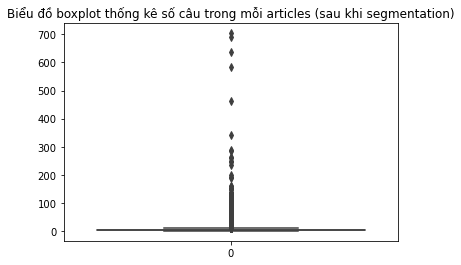

In [198]:
sns.boxplot(data=num_sentence_corpus)
plt.title('Biểu đồ boxplot thống kê số câu trong mỗi articles (sau khi segmentation)')
plt.show()

Thống kê theo số token trên mỗi article / question

In [181]:
num_token_corpus = np.array([np.sum([len(sentence) for sentence in icorpus]) for icorpus in list_seg_corpus_txt])
num_token_ques = np.array([np.sum([len(sentence) for sentence in iques]) for iques in list_seg_ques_txt])

In [209]:
print('Số token trung bình trong corpus: ', np.average(num_token_corpus))
print('Số token nhiều nhất trong corpus: ', np.max(num_token_corpus))

print('Số token trung bình trong ques: ', np.average(num_token_ques))
print('Số token nhiều nhất trong ques: ', np.max(num_token_ques))

Số token trung bình trong corpus:  226.49175417175417
Số token nhiều nhất trong corpus:  52218.0
Số token trung bình trong ques:  13.533792240300375
Số token nhiều nhất trong ques:  31


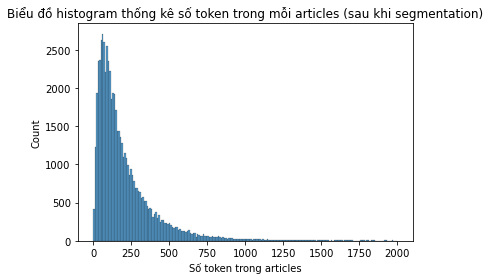

In [199]:
# Histogram số token trong mỗi articles
sns.histplot(data=num_token_corpus, binrange=(0, 2000))
plt.xlabel('Số token trong articles')
plt.title('Biểu đồ histogram thống kê số token trong mỗi articles (sau khi segmentation)')
plt.show()

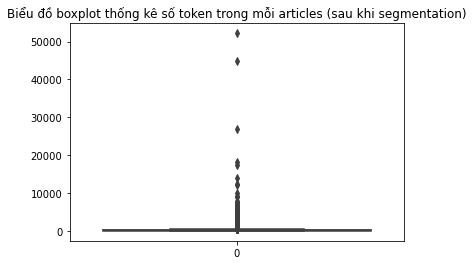

In [200]:
sns.boxplot(data=num_token_corpus)
plt.title('Biểu đồ boxplot thống kê số token trong mỗi articles (sau khi segmentation)')
plt.show()

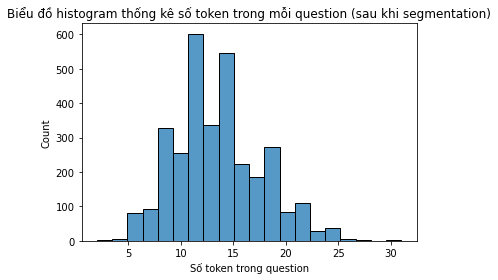

In [201]:
# Histogram số token trong mỗi articles
sns.histplot(data=num_token_ques, bins=20)
plt.xlabel('Số token trong question')
plt.title('Biểu đồ histogram thống kê số token trong mỗi question (sau khi segmentation)')
plt.show()

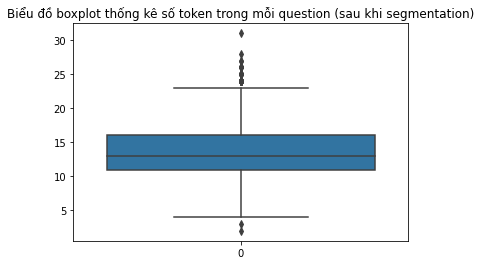

In [202]:
sns.boxplot(data=num_token_ques)
plt.title('Biểu đồ boxplot thống kê số token trong mỗi question (sau khi segmentation)')
plt.show()

# Thống kê stopword (thử nghiệm)

In [8]:
all_token = np.array([token for icorpus in list_seg_corpus_txt for sentence in icorpus for token in sentence])

In [9]:
tokens, occur = np.unique(all_token, return_counts=True)

In [282]:
# idx = np.argsort(occur)[:100]
# tokens[idx], occur[idx]
print('Tổng số tokens: ', len(tokens))
for i in range(1, 10):
    print('Số tokens xuất hiện', i, 'lần là: ', len(tokens[occur == i]))

Tổng số tokens:  38420
Số tokens xuất hiện 1 lần là:  13639
Số tokens xuất hiện 2 lần là:  5205
Số tokens xuất hiện 3 lần là:  2664
Số tokens xuất hiện 4 lần là:  1696
Số tokens xuất hiện 5 lần là:  1179
Số tokens xuất hiện 6 lần là:  962
Số tokens xuất hiện 7 lần là:  704
Số tokens xuất hiện 8 lần là:  607
Số tokens xuất hiện 9 lần là:  523


In [297]:
def is_only_dot(token):
    set_token = set()
    for t in token:
        set_token.add(t)
    if len(set_token) == 1 and list(set_token)[0] == '.':
        return True
    return False


def token_correction(token):
    if is_only_dot(token):
        return False
    return True

In [10]:
for i in np.argsort(occur):
    if occur[i] == 1:
        print(tokens[i], ' -  ', occur[i])

𝑚  -   1
98/2010/NĐ-CP.”  -   1
98/2010/TTLT-BTC-BNNPTNT-BYT  -   1
98/2011/NĐ-CP  -   1
98/2016/NĐ-CP  -   1
98/2018/NĐ-CP  -   1
trường_hợp_tra  -   1
đên  -   1
99,28%  -   1
99,99%  -   1
99.999  -   1
99/2005/NĐ-CP  -   1
99/2010/NĐ-CP)  -   1
99/2010/NĐ-CP.  -   1
chậm_tiến  -   1
99/2010/TT-BTC  -   1
99/2011/NĐ-CP  -   1
chậm_rãi  -   1
trường_thành  -   1
99/2013/NĐ-CP).  -   1
99/2013/NĐ-CP:  -   1
99/2013/TT-BTC  -   1
99/2015/NĐ-  -   1
đêm_ngày  -   1
99/2015/NĐ-CP)  -   1
99/2015/NĐ-CP).  -   1
chất loạn  -   1
99/2015/QH13  -   1
chặn_đứng  -   1
99/2015/TT-BTC  -   1
98/2007/NĐ-CP  -   1
98.700  -   1
97/2014/NĐ-CP  -   1
chế_ngự  -   1
97/2015/QH13.  -   1
trước_tác_động  -   1
trước ngày   -   1
97/2020/QH14  -   1
970  -   1
trườn  -   1
972.000  -   1
973  -   1
973/1997/QĐ-TTg  -   1
973/2001/TT-TCĐC  -   1
976.336  -   1
978032,53359  -   1
đê   -   1
98%  -   1
trường_học_sinh  -   1
98.000  -   1
98.11  -   1
98.25  -   1
98.26  -   1
98.30  -   1
98.37  -   1
9

In [306]:
for t in sorted(tokens[occur == 1]):
    if token_correction(t):
        print(t)

&_AN
+0,4
+0,7
+0,9
+13
+18.000
+2%
+20
+3
+5
+7
,_tiến_hành
-1%
-120
-151
-2
-2,66
-24
-26
-5%
-59
-63
-80
..v.v.
/TKTH-H.
/TKTH-T.
/TKTH-X.
0,0000058
0,00005
0,0001
0,0003
0,0005
0,002%
0,0025
0,004%
0,0053024
0,006
0,00826
0,015
0,018
0,020
0,025%
0,027
0,035
0,036
0,04%
0,040
0,047
0,049
0,075
0,08
0,10%
0,12
0,14
0,145
0,16
0,21
0,22
0,253
0,2532133
0,31
0,35%
0,36
0,49%
0,50%
0,550
0,60
0,628%
0,74
0,77
0,80%
0,800
0,806
0,82
0,86%
0,958
0,98
0,99%
0,9999
0-3
0-30%
0.01%
0.03
0.07
0.096
0.2
0.4
0.7
00/01/2016.
000.05.07
000000
00030
00050
0008
001-999
0037
0038
0039
0040
0091
01,3
01-01-2015
01-07
01-1,5
01-14
01-8
01-9-1011
01-TP/HT-2020-CMC.
01.005
01.02.01
01.03.05
01.1
01.4
01.QĐ/QT-QLDA.
01/01/2019
01/01/2025
01/01/2030
01/02/2020
01/03/2013
01/04/2013
01/05/2015
01/07/2009
01/07/2013
01/07/2014
01/07/2017
01/08/2001
01/09/2012
01/1
01/10/2009
01/10/2013
01/10/2019
01/11/2004
01/11/2017
01/12/1967
01/12/2003
01/12/2009
01/12/2010
01/12/2013
01/12/2014
01/12/2016
01/12/2017
0

In [283]:
idx = np.argsort(occur)[-60:]
tokens[idx], occur[idx]

(array(['quyết_định', 'đã', 'hồ_sơ', 'thông_tin', 'khác', 'cơ_sở', 'trên',
        'tiền', 'khi', 'c', 'số', '-', 'pháp_luật', 'năm', 'việc',
        'sử_dụng', 'hoạt_động', 'với', 'là', 'quản_lý', 'đến', 'Bộ', 'để',
        'sau', '3', 'khoản', 'đối_với', 'từ', 'b', 'a', 'ngày', 'phải',
        '(', 'không', 'cơ_quan', 'cho', 'Điều', 'tổ_chức', 'người', 'cấp',
        '2', '1', 'này', 'thực_hiện', 'hoặc', 'về', 'trong', ':', 'tại',
        'theo', 'được', 'quy_định', 'có', 'các', ';', 'và', 'của', ')',
        '.', ','], dtype='<U155'),
 array([ 34176,  34628,  34795,  34941,  35865,  36311,  36671,  37015,
         37342,  39146,  40158,  40232,  43943,  44498,  44959,  45820,
         47137,  47600,  47608,  49071,  49403,  49758,  50797,  51842,
         53809,  54934,  56008,  58350,  59077,  59632,  59647,  60856,
         63787,  65388,  70775,  71088,  73960,  74595,  75736,  75981,
         77514,  81966,  85571,  86913,  91402,  92938,  96766,  98164,
        117954, 153818, 

# Lưu file segmentation

In [259]:
# with open('segmented_corpus.json', 'w') as f:
#     json.dump(list_seg_corpus_txt, f)

In [261]:
# with open('segmented_corpus.json', 'r') as f:
#     a = json.load(f)